In [33]:
#Labrary Definition
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#Load Scene
scene = cv2.imread('./scenes/e2.png',cv2.COLOR_BGR2RGB)

#Load Model
model = cv2.imread('./models/1.jpg',cv2.COLOR_BGR2RGB)


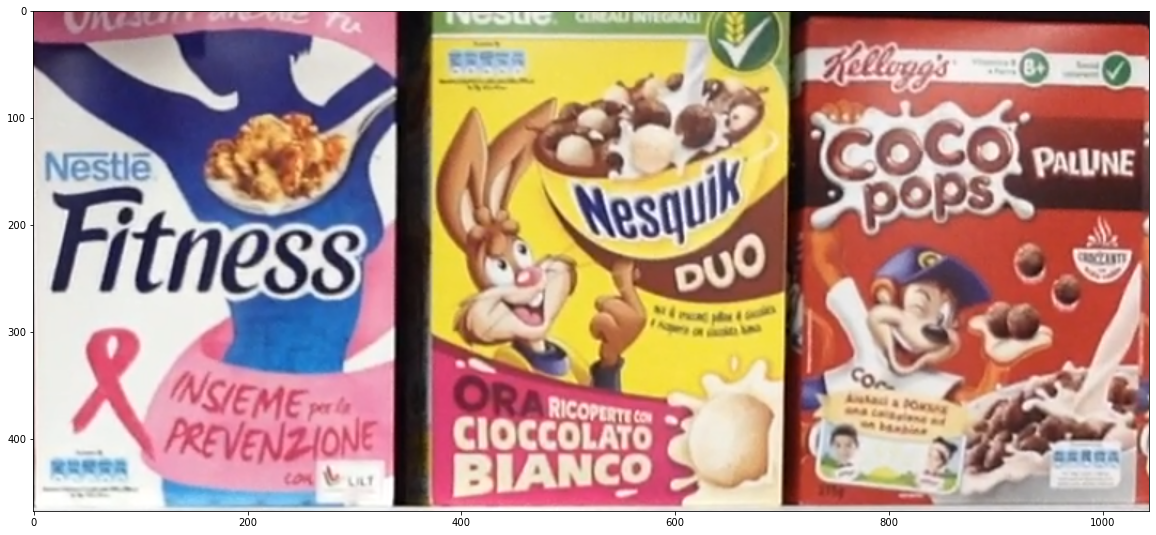

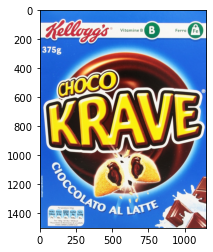

In [35]:
#Plot Scene
plt.figure(figsize=(20, 10)) 
plt.imshow(cv2.cvtColor(scene,cv2.COLOR_BGR2RGB))

#Plot Model
plt.figure() 
plt.imshow(cv2.cvtColor(model,cv2.COLOR_BGR2RGB))

In [52]:
sift = cv2.xfeatures2d.SIFT_create()
gray= cv2.cvtColor(scene,cv2.COLOR_BGR2GRAY)
kp = sift.detect(scene,None)
print(kp[2].pt)
img=cv2.drawKeypoints(scene,kp,scene)

cv2.imwrite('sift_keypoints.jpg',img);

(2.4131975173950195, 273.78619384765625)


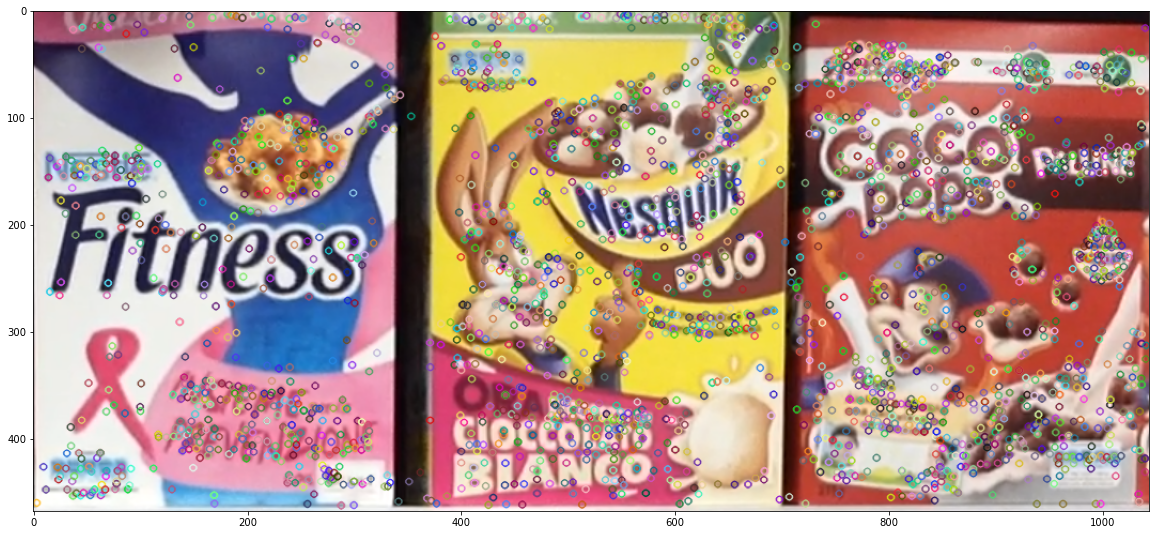

In [37]:
#Plot Scene
plt.figure(figsize=(20, 10)) 
plt.imshow(cv2.cvtColor(scene,cv2.COLOR_BGR2RGB))

516
(223.79627990722656, 145.6046142578125)


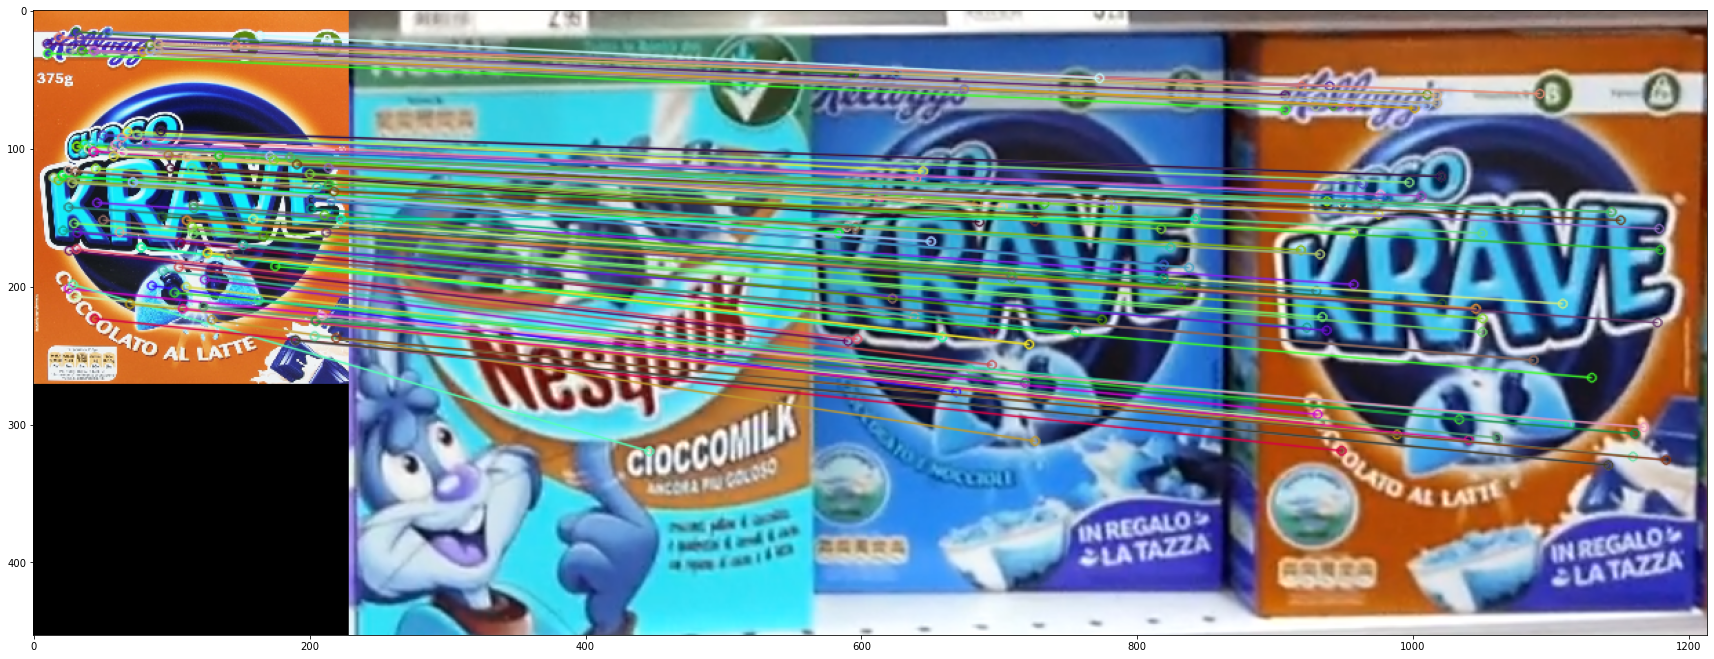

[0.77581316 0.7635148  0.77593094 0.74437773 0.8144047  0.79409146
 0.7109703  0.7109703  0.7269716  0.73994875 0.6659459  0.893326
 0.74725413 0.6742576  0.72903246 0.72903246 0.7444438  0.6788613
 1.0739745  0.6137422  0.7074087  0.645142   0.7413634  0.7413634
 0.6956808  0.67744744 0.67744744 0.7648772  0.7648772  0.7633832
 0.76251286 0.7289586  0.7823586  0.749471   0.7513871  0.75077987
 1.0251546  0.69383204 0.7047524  0.8123735  0.7619361  0.7537704
 0.71320146 1.2639565  0.70912594 0.6301788  0.699729   0.6354643
 0.7809886  0.6585281  0.76913774 0.72711986 0.7832834  0.668809
 0.74241704 0.74241704 0.71862745 0.6628165  0.6628165  0.72221065
 0.74496526 0.78821874 0.7104032  0.73784375 0.82815194 0.6754103
 0.70178276 0.72209114 0.72209114 0.7199995  0.7051572  0.78859264
 0.69348335 0.7282122  0.61393404 0.7462224  0.7834336  0.6329382
 0.71129376 0.7251103  0.7251103  0.621191   0.59200567 0.7277179
 0.691515   0.6793487  0.71973044 0.79384816 0.5846095  0.73955375
 0.7395

In [93]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('./models/1.jpg',cv2.COLOR_BGR2RGB) # queryImage
img2 = cv2.imread('./scenes/e3.png',cv2.COLOR_BGR2RGB) # trainImage
#percent by which the image is resized
scale_percent = 20
#calculate the 50 percent of original dimensions
width = int(img1.shape[1] * scale_percent / 100)
height = int(img2.shape[0] *3*scale_percent / 100)
# dsize
dsize = (width, height)
# resize image
img1 = cv2.resize(img1, dsize)

sift = cv2.xfeatures2d.SIFT_create()


FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
# Initiate SIFT detector

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)



# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
matches = flann.knnMatch(des1,des2,k=2)


# Apply ratio test
good = []
good = []
for m,n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)
print(m.queryIdx)
print(kp1[m.queryIdx].pt)

src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

src_pts_size = np.float32([ des1[m.queryIdx].size for m in good ])
dst_pts_size = np.float32([ des2[m.trainIdx].size for m in good ])


src_pts_size = np.float32([ kp1[m.queryIdx].size for m in good ])
dst_pts_size = np.float32([ kp2[m.trainIdx].size for m in good ])


ratio_of_sizes = src_pts_size / dst_pts_size
# cv2.drawMatchesKnn expects list of lists as matches.
#img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.figure(figsize=(30, 15))
plt.imshow(img3)
plt.show()

print(ratio_of_sizes)
print(src_pts_size)

Not enough matches are found - 0/10


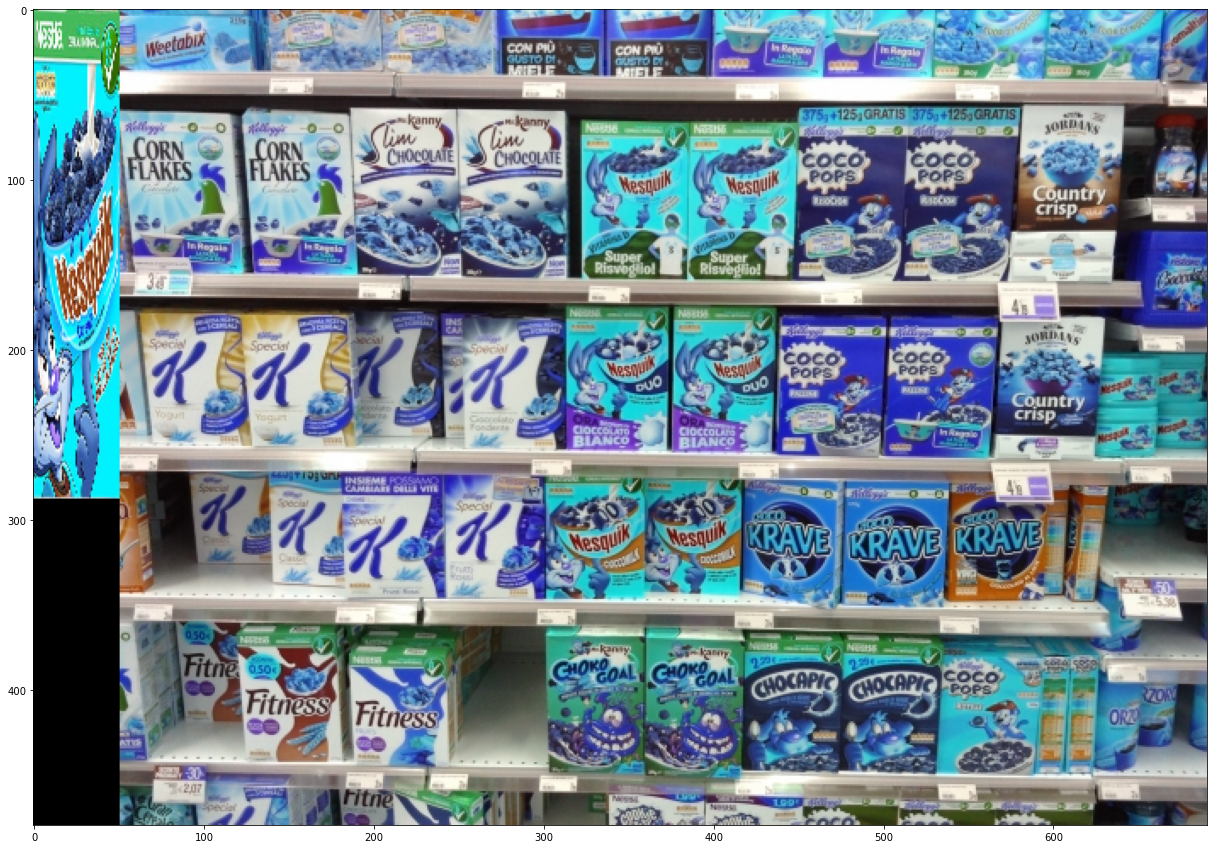

(<Figure size 2160x1080 with 1 Axes>,
 None)

In [57]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread('./models/5.jpg',cv2.COLOR_BGR2RGB) # queryImage
img2 = cv2.imread('./scenes/h1.jpg',cv2.COLOR_BGR2RGB) # trainImage
#percent by which the image is resized
scale_percent = 20
#calculate the 50 percent of original dimensions
width = int(img1.shape[1] * scale_percent / 100)
height = int(img2.shape[0] *3*scale_percent / 100)
# dsize
dsize = (width, height)
# resize image
img1 = cv2.resize(img1, dsize)

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create(nfeatures=5000)
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
        
        
        

        
        
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    
    
    
    
    
    
    
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize=(30, 15)),plt.imshow(img3, 'gray'),plt.show()